In [1]:
import SimpleITK as sitk
import numpy as np
# import scipy.ndimage as ndimage
import os 
import matplotlib.pyplot as plt 
# import torch

In [4]:
imp= "rrrrr.mha"
im=sitk.ReadImage(imp, sitk.sitkInt16)
img = sitk.GetArrayFromImage(im)


In [8]:
t= "107_mask.mha"
tt=sitk.ReadImage(t, sitk.sitkInt16)
ttt = sitk.GetArrayFromImage(tt)


In [9]:
print(np.unique(ttt[100,:,:], return_counts=True))

(array([ 0,  1, 11, 21, 22], dtype=int16), array([98392,   178,  1492,  1450,     8], dtype=int64))


In [5]:
print(np.shape(img))

(273, 235, 432)


In [10]:
print(np.unique(img[100,:,:] , return_counts=True))

(array([ 0,  1, 11, 21, 22], dtype=int16), array([98392,   178,  1492,  1450,     8], dtype=int64))


In [8]:
output_array=np.array(l)
output_image = sitk.GetImageFromArray(output_array)
output_image.SetOrigin(im.GetOrigin())
output_image.SetSpacing(im.GetSpacing())
output_image.SetDirection(im.GetDirection())


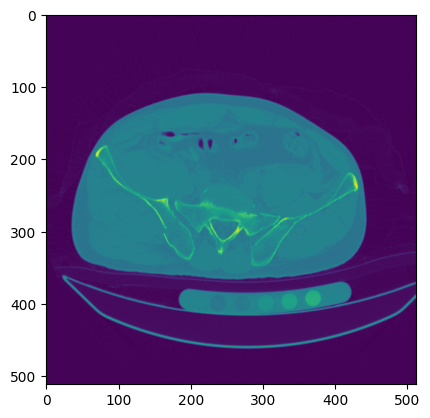

In [11]:
plt.imshow(output_array[3,:,:])

In [12]:

output_file = "small.mha"
sitk.WriteImage(output_image, str(output_file))


In [4]:
axial=img
coronal=torch.permute(torch.tensor(img) , (1,0,2))
sagital=torch.permute(torch.tensor(img) , (2,1,0))
print(coronal.shape)
print(sagital.shape)

torch.Size([276, 337, 413])
torch.Size([413, 276, 337])


In [ ]:
print(img[:,100,:])
print(img[        ])

In [5]:
l=[]
for i in range(a):
    l.append(img[i,:,:])
print(np.shape(l))

l1=[]
for j in range(b):
    l1.append(img[:,j,:])

print(np.shape(l1))

l2=[]
for k in range(c):
    l2.append(img[:,:,k])
print(np.shape(l2))

(337, 276, 413)
(276, 337, 413)
(413, 337, 276)


In [7]:
coronal=torch.permute(torch.tensor(l1) , (1,0,2))
sagital=torch.permute(torch.tensor(l2) , (1,2,0))
print(coronal.shape)
print(sagital.shape)

torch.Size([337, 276, 413])
torch.Size([337, 276, 413])


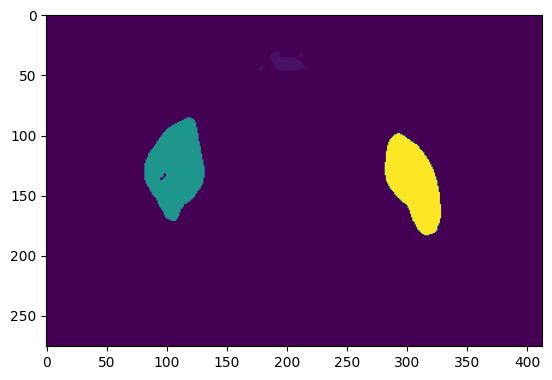

In [23]:
plt.imshow(coronal[:,150,:])
plt.imshow(coronal[150,:,:])

# plt.imshow(sagital[:,150,:])
# print(    img[200,150,:])

In [54]:
x=torch.tensor(np.array(l1))
y=torch.permute(x,(1,0,2))

In [56]:
print(np.allclose(np.array(y) , img))

True


In [33]:
print(final.shape)
print(final.nbytes)
print(img.nbytes)
print( np.allclose(final,img ))

(337, 276, 413)
76827912
76827912
True


In [27]:
print( np.allclose(u,img ))

True


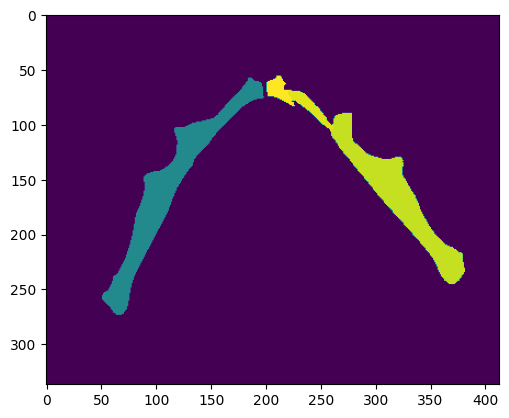

In [49]:
plt.imshow(initial[:,150,:])

In [11]:
t= "PENGWIN_labels/062.mha"
tw=sitk.ReadImage(t, sitk.sitkInt16)
two = sitk.GetArrayFromImage(tw)
u,i,o=np.shape(two)
print(u,i,o)

303 280 511


In [ ]:
l1=[]
for i in range(u):
    l1.append(percentage(two[i,:,:]))
print((l1))

In [3]:
def percentage(mask):
    return (np.sum(mask > 0) / mask.size) * 100


In [ ]:
l=[]
for i in range(a):
    l.append(percentage(img[i,:,:]))
print((l))

38
0.031582271818086115


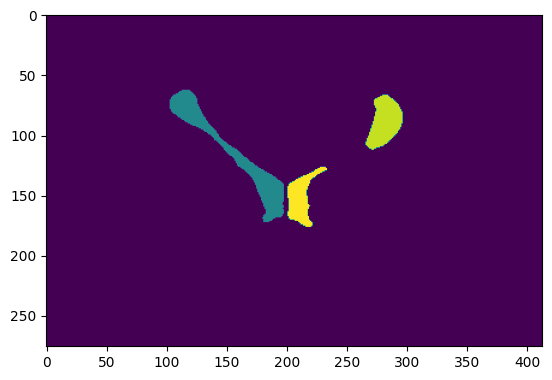

In [20]:
for i in range(len(l)):
    if l[i]>0:
        print(i)
        print(l[i])
        plt.imshow(img[i+30,:,:])
        break

17
0.012580374615599665


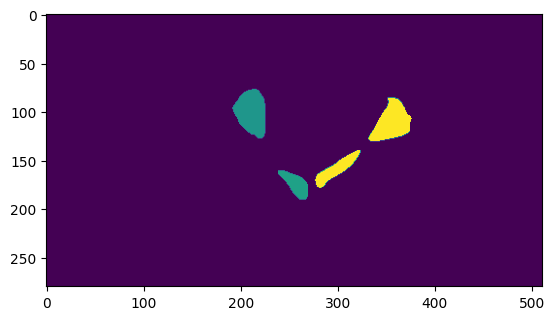

In [21]:
for i in range(len(l1)):
    if l1[i]>0:
        print(i)
        print(l1[i])
        plt.imshow(two[i+40,:,:])

        break

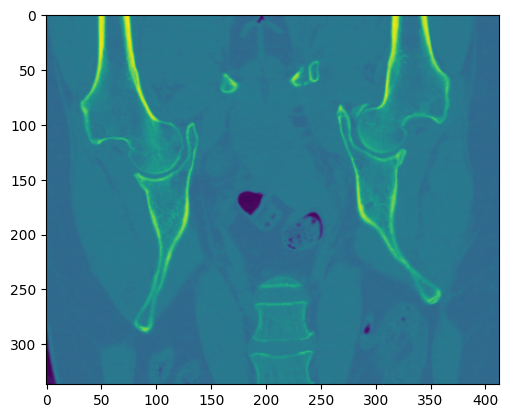

In [3]:
plt.imshow(img[:,125,:])

In [4]:
def pad_torch(x, a, b):
    r, c = x.shape  # Get the last two dimensions
    temp = torch.zeros((a, b), device=x.device)
    r_start = (a - r) // 2
    c_start = (b - c) // 2
    temp[r_start:r_start+r, c_start:c_start+c] = x
    return temp

In [9]:
s = sitk.ReadImage(imp, sitk.sitkInt16)

seg = sitk.GetArrayFromImage(s)
seg_tensor = torch.from_numpy(seg)

seg_tensor = seg_tensor[:,:,300:302].permute(2,0,1)
print(seg_tensor.shape)
print(np.unique(seg_tensor))

slicess = seg_tensor # Shape: [2, 512, 312]

padded_slices = torch.stack([pad_torch(img_slice, 512, 512) for img_slice in slicess])  # Shape: [2, 512, 512]
final_slicess = padded_slices.unsqueeze(1)  # Shape: [1, 1, 2, 512, 512]
arr=final_slicess[0,0,:,:]
print(np.unique(arr))
print(arr.shape)


torch.Size([2, 337, 276])
[-1021 -1020 -1019 ...  1270  1271  1277]
[-1021. -1020. -1019. ...  1268.  1270.  1271.]
torch.Size([512, 512])


In [ ]:
a = torch.stack([pad_torch(torch.clamp(img_slice, min=-350, max=350), 512, 512) for img_slice in slicess])  # Shape: [2, 512, 512]
c = a.unsqueeze(1)  # Shape: [1, 1, 2, 512, 512]
d=c[0,0,:,:]
print(np.unique(d))
print(d.shape)


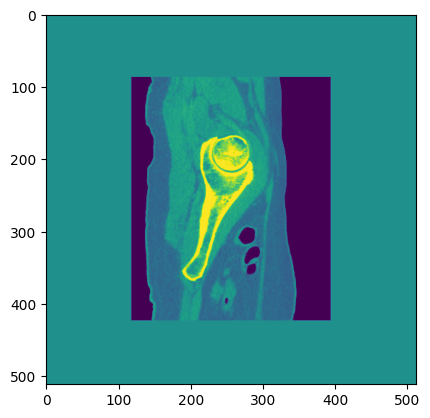

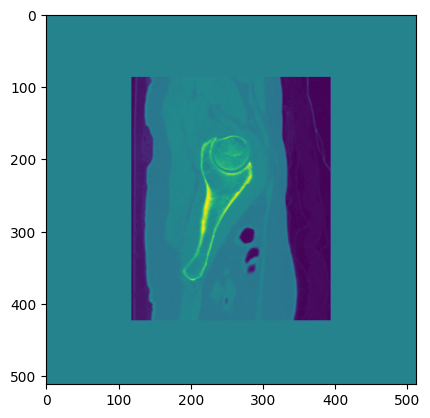

In [11]:
plt.imshow(d)
plt.show()
plt.imshow(arr)
plt.show()

In [8]:
segp= "PENGWIN_labels/002.mha"
s=sitk.ReadImage(segp, sitk.sitkInt16)
sss = sitk.GetArrayFromImage(s)
a,b,c=np.shape(sss)
print(a,b,c)

337 276 413


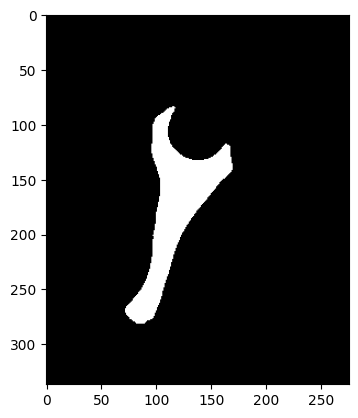

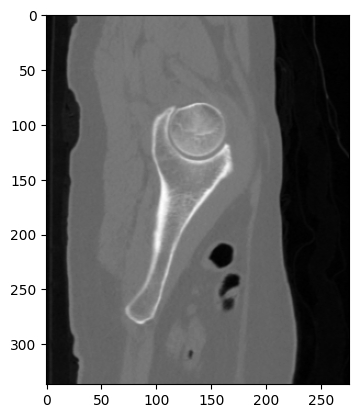

In [4]:
plt.imshow(sss[:,:,301] , cmap="gray")
plt.show()
plt.imshow(img[:,:,301] , cmap="gray")
plt.show()

In [6]:
def percentage(mask):
    return (np.sum(mask > 0) / mask.size) * 100
# a=np.zeros((2,2))
# print(a.shape)
# print(percentage(a))

In [ ]:
l1=[]
for x in (os.listdir("PENGWIN_labels")[:] ):
    imp=os.path.join("PENGWIN_labels" , x )
    one = sitk.ReadImage(imp, sitk.sitkInt16)
    seg = sitk.GetArrayFromImage(one)
    l=[]
    print("total" , np.shape(seg)[0])
    for i in range(np.shape(seg)[0]):
        t=seg[i,:,:]


        l.append(percentage(t))
    for i in range(len(l)-1):
        if l[i+1]>0:
            start=i+1
            break
    
    for j in range(len(l)):
       if l[-j-1]>0:
           end=len(l)-j-1
           break
    print(start,end)
            
    l1.append((100*l.count(0))/len(l))
    print(l.count(0))


print(l1)    

In [32]:
print(np.shape(l1))
print(len(l1))

(100,)
100


In [10]:
l=[]
for i in range(a):
    t=seg[i,:,:]
    l.append(percentage(t))
print(len(l))
for i in range(len(l)-1):
    if l[i+1]>0:
        start=i+1
        break
    
for j in range(len(l)):
    if l[-j-1]>0:
        end=len(l)-j-1
        break
print(start , end ,l[start] , l[end])

print((len(l)-start-end)*100/(len(l)))

303


303
27 286 0.1563806245389722 0.0068846815834767644


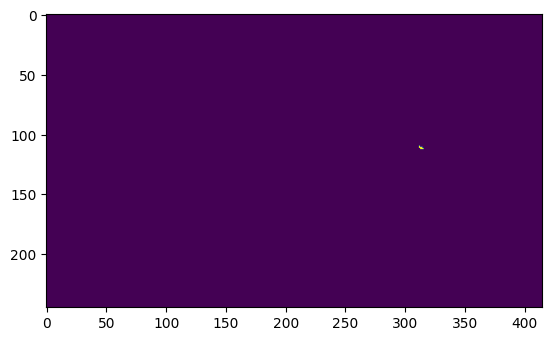

In [17]:
plt.imshow(seg[286,:,:])

In [10]:
arr=[]

for i in range(100):
    arr.append(seg[i,:,:] )
print(np.shape(arr))
x=np.stack(arr , axis=0)
print(np.shape(x))

(100, 245, 415)
(100, 245, 415)


In [ ]:
import numpy as np
import SimpleITK as sitk

segp = "PENGWIN_images/010.mha"
im = sitk.ReadImage(segp, sitk.sitkInt16)
s = sitk.GetArrayFromImage(im)
print("Original shape:", np.shape(s))

l = []
for i in range(0, np.shape(s)[0], 3):
    batch = s[i:i+3, :, :]
    t=[]
    for x in batch:
        x=pad(x,512,512)
        t.append(x)

    print((torch.stack(t).squeeze(0).unsqueeze(1).shape))
    break

print("Number of batches:", len(l))
print("Shapes of batches:")
# print(l[-1].shape)



In [26]:
def pad(x , a,b):
    r,c=np.shape(x)
    temp=np.zeros((a,b))
    temp[ (a-r)//2:(a+r)//2 , (b-c)//2:(b+c)//2 ] =x 
    return temp 


In [19]:
import numpy as np

def scale_image(image, new_min=-300, new_max=300):
    old_min, old_max = np.min(image), np.max(image)
    
    # Avoid division by zero
    if old_min == old_max:
        return np.full_like(image, new_min)
    
    # Linear scaling
    scaled = (image - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    
    return scaled

# Usage
scaled_image = scale_image(s)
print(len(np.unique(s)))

2621


In [17]:
print(np.shape(s[0,:,:]))

(245, 415)


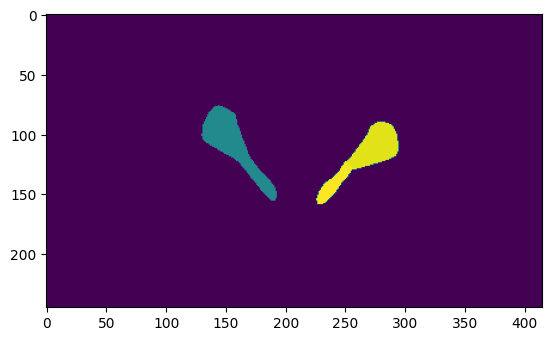

In [11]:
plt.imshow(x[50])
plt.show()

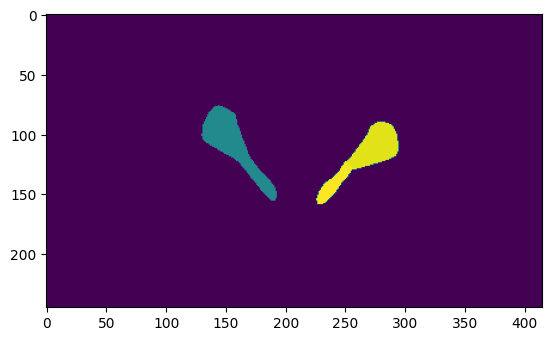

In [12]:
plt.imshow(arr[50])
plt.show()

In [ ]:
def epochnum(file):
    start,end,s = 0,0,file
    for i in range(len(s)):
        if s[i] == "h":
            start = i + 1
            break
    for i in range(len(s)):
        if s[i] == "-":
            end = i
            break
    return int(file[start:end])


def train(model, optim, criterion, dataloader, epochs, device, start_epoch):
    for epoch in range(start_epoch + 1, start_epoch + epochs +1):
        full_loss=[]
        
        for img, msk in dataloader:
            image_loss=0
            num=img.shape[1]
            for i in range(0 , num , 2):
                image=img[:,i:i+2,:,:]
                mask= msk[:,i:i+2,:,:]
                
                im_l=[]
                ms_l=[]
                for i in range(2):
                    a=image[0][i,:,:]
                    b=mask[0][i,:,:]
                    print(a.shape)
                    a,b=pad(a.cpu(),512,512),pad(b.cpu(),512,512)
                    im_l.append(a)
                    ms_l.append(b)                

                    
                image_tensor= torch.Tensor(im_l).squeeze(0).unsqueeze(1).to(device)
                mask_tensor = torch.Tensor(ms_l).squeeze(0).to(device)
                print(image_tensor.shape  , mask_tensor.shape)
                optim.zero_grad()
                out=model(image_tensor)
                print(out.shape)
                
                loss=criterion(out.long() , mask_tensor)

                loss.backward()
                image_loss+= loss.item()    
            optim.step() 
            avg=image_loss/num
            full_loss.append(avg)

            print(f"current  image loss {avg}")
             
        scheduler.step(mean_loss)
        summ=sum(full_loss)
        mean_loss=summ/len(full_loss)
        
        print(f"epoch {epoch}, loss {summ:.4f}, mean_loss {mean_loss:.4f}")
        if epoch%5==0:
            model_filename = f"epoch{epoch}-loss{summ:.4f}.pth"
            model_path = os.path.join("/kaggle/working", model_filename)
            torch.save(model.state_dict(), model_path)
            print(f"Model saved: {model_path}")